# Writing Structured Programs

## 1   Back to the Basics

### Assignment

List Assignment and Computer Memory: Two list objects foo and bar reference the same location in the computer's memory; updating foo will also modify bar, and vice versa.


In [3]:
>>> foo = 'Monty'
>>> bar = foo
>>> foo = 'Python'
>>> bar

'Monty'

In [4]:
>>> foo = ['Monty', 'Python']
>>> bar = foo
>>> foo[1] = 'Bodkin'
>>> bar

['Monty', 'Bodkin']

In [13]:
>>> empty = []
>>> nested = [empty, empty, empty]
>>> nested

[[], [], []]

In [14]:
>>> nested[1].append('Python')
>>> nested

[['Python'], ['Python'], ['Python']]

In [15]:
>>> nested = [[]] * 3
>>> nested

[[], [], []]

In [16]:
>>> nested[1].append('Python')
>>> nested

[['Python'], ['Python'], ['Python']]

In [24]:
>>> print (id(nested[0]))
>>> print (id(nested[1]))
>>> print (id(nested[2]))

4372866504
4371816392
4372868936


In [25]:
>>> nested = [[]] * 3
>>> nested[1].append('Python')
>>> nested[1] = ['Monty']
>>> nested

[['Python'], ['Monty'], ['Python']]

In [26]:
>>> bar = nested
>>> bar

[['Python'], ['Monty'], ['Python']]

In [27]:
>>> bar = nested[:]
>>> bar

[['Python'], ['Monty'], ['Python']]

In [28]:
>>> nested[2] = ['Monty']
>>> bar

[['Python'], ['Monty'], ['Python']]

### Equality

Python provides two ways to check that a pair of items are the same. The ***is*** operator tests for object identity. 

In [41]:
>>> size = 5
>>> python = ['Python']
>>> snake_nest = [python] * size
>>> snake_nest

[['Python'], ['Python'], ['Python'], ['Python'], ['Python']]

In [42]:
>>> snake_nest[0] == snake_nest[1] == snake_nest[2] == snake_nest[3] == snake_nest[4]

True

In [43]:
>>> snake_nest[0] is snake_nest[1] is snake_nest[2] is snake_nest[3] is snake_nest[4]

True

In [44]:
>>> [id(snake) for snake in snake_nest]

[4372355464, 4372355464, 4372355464, 4372355464, 4372355464]

In [45]:
>>> import random
>>> position = random.choice(range(size))
>>> snake_nest[position] = ['Python']
>>> snake_nest

[['Python'], ['Python'], ['Python'], ['Python'], ['Python']]

In [46]:
>>> snake_nest[0] == snake_nest[1] == snake_nest[2] == snake_nest[3] == snake_nest[4]

True

In [47]:
>>> snake_nest[0] is snake_nest[1] is snake_nest[2] is snake_nest[3] is snake_nest[4]

False

In [48]:
>>> [id(snake) for snake in snake_nest]

[4372925640, 4372355464, 4372355464, 4372355464, 4372355464]

### Conditionals

In [49]:
>>> mixed = ['cat', '', ['dog'], []]
>>> for element in mixed:
...     if element:
...         print(element)

cat
['dog']


In [50]:
>>> animals = ['cat', 'dog']
>>> if 'cat' in animals:
...     print(1)
... elif 'dog' in animals:
...     print(2)

1


In [51]:
>>> sent = ['No', 'good', 'fish', 'goes', 'anywhere', 'without', 'a', 'porpoise', '.']
>>> all(len(w) > 4 for w in sent)

False

In [52]:
>>> sent = ['No', 'good', 'fish', 'goes', 'anywhere', 'without', 'a', 'porpoise', '.']
>>> any(len(w) > 4 for w in sent)

True

## 2   Sequences

So far, we have seen two kinds of sequence object: strings and lists. Another kind of sequence is called a tuple. Tuples are formed with the comma operator, and typically enclosed using parentheses.

In [54]:
>>> t = 'walk', 'fem', 3
>>> print (t)
>>> print (t[0])
>>> print (t[1:])
>>> print (len(t))

('walk', 'fem', 3)
walk
('fem', 3)
3


Compare strings, lists and tuples directly, and do the indexing, slice, and length operation on each type:

In [55]:
>>> raw = 'I turned off the spectroroute'
>>> text = ['I', 'turned', 'off', 'the', 'spectroroute']
>>> pair = (6, 'turned')
>>> raw[2], text[3], pair[1]

('t', 'the', 'turned')

In [56]:
>>> raw[-3:], text[-3:], pair[-3:]

('ute', ['off', 'the', 'spectroroute'], (6, 'turned'))

In [57]:
>>> len(raw), len(text), len(pair)

(29, 5, 2)

### Operating on Sequence Types

We can iterate over the items in a sequence s in a variety of useful ways.

We can convert between these sequence types. For example, tuple(s) converts any kind of sequence into a tuple, and list(s) converts any kind of sequence into a list.

In [62]:
>>> import nltk
>>> raw = 'Red lorry, yellow lorry, red lorry, yellow lorry.'
>>> text = nltk.word_tokenize(raw)
>>> fdist = nltk.FreqDist(text)
>>> sorted(fdist)

[',', '.', 'Red', 'lorry', 'red', 'yellow']

In [66]:
type(fdist)

nltk.probability.FreqDist

In [67]:
fdist

FreqDist({',': 3, '.': 1, 'Red': 1, 'lorry': 4, 'red': 1, 'yellow': 2})

In [68]:
>>> for key in fdist:
...     print(key + ':', fdist[key], end='; ')

Red: 1; lorry: 4; ,: 3; yellow: 2; red: 1; .: 1; 

In [71]:
# we use tuples to re-arrange the contents of our list.
>>> words = ['I', 'turned', 'off', 'the', 'spectroroute']
>>> words[2], words[3], words[4] = words[3], words[4], words[2]
>>> words

['I', 'turned', 'the', 'spectroroute', 'off']

In [72]:
# zip() takes the items of two or more sequences and "zips" them together into a single list of tuples.
>>> words = ['I', 'turned', 'off', 'the', 'spectroroute']
>>> tags = ['noun', 'verb', 'prep', 'det', 'noun']
>>> zip(words, tags)

In [73]:
>>> list(zip(words, tags))

[('I', 'noun'),
 ('turned', 'verb'),
 ('off', 'prep'),
 ('the', 'det'),
 ('spectroroute', 'noun')]

In [74]:
>>> list(enumerate(words))

[(0, 'I'), (1, 'turned'), (2, 'off'), (3, 'the'), (4, 'spectroroute')]

In [75]:
# we might want to "train" a system on 90% of the data and test it on the remaining 10%. 
>>> text = nltk.corpus.nps_chat.words()
>>> cut = int(0.9 * len(text))
>>> training_data, test_data = text[:cut], text[cut:]
>>> text == training_data + test_data

True

In [77]:
>>> print (len(training_data))
>>> print (len(test_data))
>>> print (len(text))
>>> len(training_data) / len(test_data)

40509
4501
45010


9.0

### Combining Different Sequence Types

In [83]:
>>> words = 'I turned off the spectroroute'.split()
>>> wordlens = [(len(word), word) for word in words]
>>> wordlens.sort()
>>> ' '.join(w for (_, w) in wordlens)

'I off the turned spectroroute'

In [94]:
>>> lexicon = [
...     ('the', 'det', ['Di:', 'D@']),
...     ('off', 'prep', ['Qf', 'O:f'])
... ]
>>> lexicon[1]

('off', 'prep', ['Qf', 'O:f'])

In [96]:
# In Python, lists are mutable, while tuples are immutable. In other words, lists can be modified, while tuples cannot.
>>> lexicon.sort()
>>> lexicon[1] = ('turned', 'VBD', ['t3:nd', 't3`nd'])
>>> lexicon[1]

('turned', 'VBD', ['t3:nd', 't3`nd'])

In [98]:
>>> lexicon = tuple(lexicon)
>>> lexicon[1]

('turned', 'VBD', ['t3:nd', 't3`nd'])

In [100]:
# >>> lexicon[1] = ('turned', 'VBD', ['t3:nd', 't3`nd'])
# >>> lexicon[1]

### Generator Expressions

In [109]:
>>> text = '''"When I use a word," Humpty Dumpty said in rather a scornful tone,
... "it means just what I choose it to mean - neither more nor less."'''
>>> [w.lower() for w in nltk.word_tokenize(text)]

['``',
 'when',
 'i',
 'use',
 'a',
 'word',
 ',',
 "''",
 'humpty',
 'dumpty',
 'said',
 'in',
 'rather',
 'a',
 'scornful',
 'tone',
 ',',
 "''",
 'it',
 'means',
 'just',
 'what',
 'i',
 'choose',
 'it',
 'to',
 'mean',
 '-',
 'neither',
 'more',
 'nor',
 'less',
 '.',
 "''"]

In [110]:
>>> max([w.lower() for w in nltk.word_tokenize(text)])

'word'

In [113]:
[w.lower() for w in nltk.word_tokenize(text)]

['``',
 'when',
 'i',
 'use',
 'a',
 'word',
 ',',
 "''",
 'humpty',
 'dumpty',
 'said',
 'in',
 'rather',
 'a',
 'scornful',
 'tone',
 ',',
 "''",
 'it',
 'means',
 'just',
 'what',
 'i',
 'choose',
 'it',
 'to',
 'mean',
 '-',
 'neither',
 'more',
 'nor',
 'less',
 '.',
 "''"]

In [116]:
# This uses a generator expression.
>>> max(w.lower() for w in nltk.word_tokenize(text))

'word'

In [117]:
(w.lower() for w in nltk.word_tokenize(text))

<generator object <genexpr> at 0x10a04b150>

## 3   Questions of Style

### Python Coding Style

Code layout should use four spaces per indentation level. You should make sure that when you write Python code in a file, you avoid tabs for indentation, since these can be misinterpreted by different text editors and the indentation can be messed up. Lines should be less than 80 characters long; if necessary you can break a line inside parentheses, brackets, or braces, because Python is able to detect that the line continues over to the next line. If you need to break a line outside parentheses, brackets, or braces, you can often add extra parentheses, and you can always add a backslash at the end of the line that is broken:

In [119]:
>>> syllables = 'Python Programming'
>>> if (len(syllables) > 4 and len(syllables[2]) == 3 and
...    syllables[2][2] in [aeiou] and syllables[2][3] == syllables[1][3]):
...     process(syllables)
>>> if len(syllables) > 4 and len(syllables[2]) == 3 and \
...    syllables[2][2] in [aeiou] and syllables[2][3] == syllables[1][3]:
...     process(syllables)

### Procedural vs Declarative Style

*** Procedural style ***

In [121]:

>>> tokens = nltk.corpus.brown.words(categories='news')
>>> count = 0
>>> total = 0
>>> for token in tokens:
...     count += 1
...     total += len(token)
>>> total / count

4.401545438271973

*** Declarative style ***

In [128]:
# The first line uses a generator expression to sum the token lengths, while the second line computes the average as before.
>>> tokens = nltk.corpus.brown.words(categories='news')
>>> total = sum(len(t) for t in tokens)
>>> print(total / len(tokens))
>>> print(total)
>>> print(len(tokens))

4.401545438271973
442593
100554


In [132]:
# Procedural
#>>> word_list = []
#>>> i = 0
#>>> while i < len(tokens):
#...     j = 0
#...     while j < len(word_list) and word_list[j] <= tokens[i]:
#...         j += 1
#...     if j == 0 or tokens[i] != word_list[j-1]:
#...         word_list.insert(j, tokens[i])
#...     i += 1

In [133]:
# Declarative
>>> word_list = sorted(set(tokens))

In [134]:
>>> fd = nltk.FreqDist(nltk.corpus.brown.words())
>>> cumulative = 0.0
>>> most_common_words = [word for (word, count) in fd.most_common()]
>>> for rank, word in enumerate(most_common_words):
...     cumulative += fd.freq(word)
...     print("%3d %6.2f%% %s" % (rank + 1, cumulative * 100, word))
...     if cumulative > 0.25:
...         break

  1   5.40% the
  2  10.42% ,
  3  14.67% .
  4  17.78% of
  5  20.19% and
  6  22.40% to
  7  24.29% a
  8  25.97% in


In [135]:
>>> text = nltk.corpus.gutenberg.words('milton-paradise.txt')
>>> longest = ''
>>> for word in text:
...     if len(word) > len(longest):
...         longest = word
>>> longest

'unextinguishable'

In [138]:
>>> maxlen = max(len(word) for word in text)
>>> maxlen

16

In [137]:
>>> [word for word in text if len(word) == maxlen]

['unextinguishable',
 'transubstantiate',
 'inextinguishable',
 'incomprehensible']

### Some Legitimate Uses for Counters

In [139]:
>>> sent = ['The', 'dog', 'gave', 'John', 'the', 'newspaper']
>>> n = 3
>>> [sent[i:i+n] for i in range(len(sent)-n+1)]

[['The', 'dog', 'gave'],
 ['dog', 'gave', 'John'],
 ['gave', 'John', 'the'],
 ['John', 'the', 'newspaper']]

In [142]:
>>> import pprint
>>> m, n = 3, 7
>>> array = [[set() for i in range(n)] for j in range(m)]
>>> array[2][5].add('Alice')
>>> pprint.pprint(array)

[[set(), set(), set(), set(), set(), set(), set()],
 [set(), set(), set(), set(), set(), set(), set()],
 [set(), set(), set(), set(), set(), {'Alice'}, set()]]


In [143]:
>>> array = [[set()] * n] * m
>>> array[2][5].add(7)
>>> pprint.pprint(array)

[[{7}, {7}, {7}, {7}, {7}, {7}, {7}],
 [{7}, {7}, {7}, {7}, {7}, {7}, {7}],
 [{7}, {7}, {7}, {7}, {7}, {7}, {7}]]


## 4   Functions: The Foundation of Structured Programming

In [144]:
import re
def get_text(file):
    """Read text from a file, normalizing whitespace and stripping HTML markup."""
    text = open(file).read()
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub('\s+', ' ', text)
    return text

In [145]:
# The first string inside a function definition is called a docstring. Not only does it document the purpose of the function to someone reading the code, it is accessible to a programmer who has loaded the code from a file:
help(get_text)

Help on function get_text in module __main__:

get_text(file)
    Read text from a file, normalizing whitespace and stripping HTML markup.



### Function Inputs and Outputs

In [146]:
>>> def repeat(msg, num):
...     return ' '.join([msg] * num)
>>> monty = 'Monty Python'
>>> repeat(monty, 3)

'Monty Python Monty Python Monty Python'

In [147]:
>>> def monty():
...     return "Monty Python"
>>> monty()

'Monty Python'

In [148]:
>>> repeat(monty(), 3)

'Monty Python Monty Python Monty Python'

In [149]:
>>> repeat('Monty Python', 3)

'Monty Python Monty Python Monty Python'

In [150]:
>>> def my_sort1(mylist):      # good: modifies its argument, no return value
...     mylist.sort()
>>> def my_sort2(mylist):      # good: doesn't touch its argument, returns value
...     return sorted(mylist)
>>> def my_sort3(mylist):      # bad: modifies its argument and also returns it
...     mylist.sort()
...     return mylist

A Python function is not required to have a return statement. Some functions do their work as a side effect, printing a result, modifying a file, or updating the contents of a parameter to the function (such functions are called "procedures" in some other programming languages).

### Parameter Passing

Python interprets function parameters as values (this is known as call-by-value). 

In [155]:
>>> def set_up(word, properties):
...     word = 'lolcat'
...     properties.append('noun')
...     properties = 5
>>> w = ''
>>> p = []
>>> set_up(w, p)
>>> print (w)
>>> print (p)


['noun']


Notice that w was not changed by the function. When we called set_up(w, p), the value of w (an empty string) was assigned to a new variable word. Inside the function, the value of word was modified. However, that change did not propagate to w.

When we called set_up(w, p), the value of p (a reference to an empty list) was assigned to a new local variable properties, so both variables now reference the same memory location. The function modifies properties, and this change is also reflected in the value of p as we saw. The function also assigned a new value to properties (the number 5); this did not modify the contents at that memory location, but created a new local variable.

### Variable Scope

When you refer to an existing name from within the body of a function, the Python interpreter first tries to resolve the name with respect to the names that are local to the function. If nothing is found, the interpreter checks if it is a global name within the module. Finally, if that does not succeed, the interpreter checks if the name is a Python built-in. This is the so-called LGB rule of name resolution: local, then global, then built-in.

### Checking Parameter Types

Python does not allow us to declare the type of a variable when we write a program, and this permits us to define functions that are flexible about the type of their arguments. 

In [162]:
>>> def tag(word):
...     if word in ['a', 'the', 'all']:
...         return 'det'
...     else:
...         return 'noun'

In [163]:
>>> tag('the')

'det'

In [164]:
>>> tag('knight')

'noun'

In [165]:
>>> tag(["'Tis", 'but', 'a', 'scratch'])

'noun'

A naive approach would be to check the type of the argument using if not type(word) is str, and if word is not a string, to simply return Python's special empty value, None. Here's a better solution, using an assert statement together with Python's basestring type that generalizes over both unicode and str. 

In [169]:
#>>> def tag(word):
#...     assert isinstance(word, str), "argument to tag() must be a string"
#...     if word in ['a', 'the', 'all']:
#...         return 'det'
#...     else:
#...         return 'noun'
#>>> tag(["'Tis", 'but', 'a', 'scratch'])

### Functional Decomposition

Well-structured programs usually make extensive use of functions. When a block of program code grows longer than 10-20 lines, it is a great help to readability if the code is broken up into one or more functions, each one having a clear purpose.

In [173]:
import nltk
from urllib import request
from bs4 import BeautifulSoup

def freq_words(url, freqdist, n):
    html = request.urlopen(url).read().decode('utf8')
    raw = BeautifulSoup(html).get_text()
    for word in nltk.word_tokenize(raw):
        freqdist[word.lower()] += 1
    result = []
    for word, count in freqdist.most_common(n):
        result = result + [word]
    print(result)

In [174]:
>>> constitution = "http://www.archives.gov/exhibits/charters/constitution_transcript.html"
>>> fd = nltk.FreqDist()
>>> freq_words(constitution, fd, 30)

["''", ',', 'the', ':', ':1', ';', '{', '}', 'of', '(', ')', 'archives', '#', "'", '.', 'national', 'and', '[', ']', '``', 'a', 'constitution', 'documents', 'to', 'declaration', '.section-theme', 'rights', 'charters', 'freedom', 'founding']


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))


In [177]:
from urllib import request
from bs4 import BeautifulSoup

def freq_words(url, n):
    html = request.urlopen(url).read().decode('utf8')
    text = BeautifulSoup(html).get_text()
    freqdist = nltk.FreqDist(word.lower() for word in nltk.word_tokenize(text))
    return [word for (word, _) in fd.most_common(n)]

In [178]:
>>> freq_words(constitution, 30)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))


["''",
 ',',
 'the',
 ':',
 ':1',
 ';',
 '{',
 '}',
 'of',
 '(',
 ')',
 'archives',
 '#',
 "'",
 '.',
 'national',
 'and',
 '[',
 ']',
 '``',
 'a',
 'constitution',
 'documents',
 'to',
 'declaration',
 '.section-theme',
 'rights',
 'charters',
 'freedom',
 'founding']

### Documenting Functions

For the simplest functions, a one-line docstring is usually adequate. Docstrings can include a doctest block, illustrating the use of the function and the expected output. 

In [179]:
def accuracy(reference, test):
    """
    Calculate the fraction of test items that equal the corresponding reference items.

    Given a list of reference values and a corresponding list of test values,
    return the fraction of corresponding values that are equal.
    In particular, return the fraction of indexes
    {0<i<=len(test)} such that C{test[i] == reference[i]}.

        >>> accuracy(['ADJ', 'N', 'V', 'N'], ['N', 'N', 'V', 'ADJ'])
        0.5

    :param reference: An ordered list of reference values
    :type reference: list
    :param test: A list of values to compare against the corresponding
        reference values
    :type test: list
    :return: the accuracy score
    :rtype: float
    :raises ValueError: If reference and length do not have the same length
    """

    if len(reference) != len(test):
        raise ValueError("Lists must have the same length.")
    num_correct = 0
    for x, y in zip(reference, test):
        if x == y:
            num_correct += 1
    return float(num_correct) / len(reference)

In [180]:
accuracy()

TypeError: accuracy() missing 2 required positional arguments: 'reference' and 'test'

In [181]:
accuracy(['ADJ', 'N', 'V', 'N'], ['N', 'N', 'V', 'ADJ'])

0.5

## 5   Doing More with Functions

### Functions as Arguments

In [182]:
>>> sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the',
...         'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']
>>> def extract_property(prop):
...     return [prop(word) for word in sent]
>>> extract_property(len)

[4, 4, 2, 3, 5, 1, 3, 3, 6, 4, 4, 4, 2, 10, 1]

In [183]:
>>> def last_letter(word):
...     return word[-1]
>>> extract_property(last_letter)

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

*** Python provides us with one more way to define functions as arguments to other functions, so-called lambda expressions.***

In [184]:
>>> extract_property(lambda w: w[-1])

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

In [185]:
>>> extract_property(lambda w: len(w))

[4, 4, 2, 3, 5, 1, 3, 3, 6, 4, 4, 4, 2, 10, 1]

In [193]:
#>>> sorted(sent)
#>>> sorted(sent, cmp())
#>>> sorted(sent, lambda x, y: cmp(len(y), len(x)))

### Accumulative Functions

In [194]:
def search1(substring, words):
    result = []
    for word in words:
        if substring in word:
            result.append(word)
    return result

In [198]:
# The function search2() is a generator. The first time this function is called, 
# it gets as far as the yield statement and pauses. The calling program gets the first word and 
# does any necessary processing. Once the calling program is ready for another word, 
# execution of the function is continued from where it stopped, until the next time it encounters a yield statement. 
def search2(substring, words):
    for word in words:
        if substring in word:
            yield word

In [199]:
>>> for item in search1('zz', nltk.corpus.brown.words()):
...     print(item, end=" ")

Grizzlies' fizzled Rizzuto huzzahs dazzler jazz Pezza Pezza Pezza embezzling embezzlement pizza jazz Ozzie nozzle drizzly puzzle puzzle dazzling Sizzling guzzle puzzles dazzling jazz jazz Jazz jazz Jazz jazz jazz Jazz jazz jazz jazz Jazz jazz dizzy jazz Jazz puzzler jazz jazzmen jazz jazz Jazz Jazz Jazz jazz Jazz jazz jazz jazz Jazz jazz jazz jazz jazz jazz jazz jazz jazz jazz Jazz Jazz jazz jazz nozzles nozzle puzzle buzz puzzle blizzard blizzard sizzling puzzled puzzle puzzle muzzle muzzle muezzin blizzard Neo-Jazz jazz muzzle piazzas puzzles puzzles embezzle buzzed snazzy buzzes puzzled puzzled muzzle whizzing jazz Belshazzar Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie's Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie blizzard blizzards blizzard blizzard fuzzy Lazzeri Piazza piazza palazzi Piazza Piazza Palazzo Palazzo Palazzo Piazza Piazza Palazzo palazzo palazzo Palazzo Palazzo Piazza piazza piazza piazza Piazza Piazza Palazzo palazzo Piazza piazz

In [200]:
>>> for item in search2('zz', nltk.corpus.brown.words()):
...     print(item, end=" ")

Grizzlies' fizzled Rizzuto huzzahs dazzler jazz Pezza Pezza Pezza embezzling embezzlement pizza jazz Ozzie nozzle drizzly puzzle puzzle dazzling Sizzling guzzle puzzles dazzling jazz jazz Jazz jazz Jazz jazz jazz Jazz jazz jazz jazz Jazz jazz dizzy jazz Jazz puzzler jazz jazzmen jazz jazz Jazz Jazz Jazz jazz Jazz jazz jazz jazz Jazz jazz jazz jazz jazz jazz jazz jazz jazz jazz Jazz Jazz jazz jazz nozzles nozzle puzzle buzz puzzle blizzard blizzard sizzling puzzled puzzle puzzle muzzle muzzle muezzin blizzard Neo-Jazz jazz muzzle piazzas puzzles puzzles embezzle buzzed snazzy buzzes puzzled puzzled muzzle whizzing jazz Belshazzar Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie's Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie blizzard blizzards blizzard blizzard fuzzy Lazzeri Piazza piazza palazzi Piazza Piazza Palazzo Palazzo Palazzo Piazza Piazza Palazzo palazzo palazzo Palazzo Palazzo Piazza piazza piazza piazza Piazza Piazza Palazzo palazzo Piazza piazz

Here's a more sophisticated example of a generator which produces all permutations of a list of words. In order to force the permutations() function to generate all its output, we wrap it with a call to list()

In [202]:
# The ability to generate permutations of a set of words is useful for creating data to test a grammar
>>> def permutations(seq):
...     if len(seq) <= 1:
...         yield seq
...     else:
...         for perm in permutations(seq[1:]):
...             for i in range(len(perm)+1):
...                 yield perm[:i] + seq[0:1] + perm[i:]
...
>>> list(permutations(['police', 'fish', 'buffalo']))

[['police', 'fish', 'buffalo'],
 ['fish', 'police', 'buffalo'],
 ['fish', 'buffalo', 'police'],
 ['police', 'buffalo', 'fish'],
 ['buffalo', 'police', 'fish'],
 ['buffalo', 'fish', 'police']]

### Higher-Order Functions

In [203]:
>>> def is_content_word(word):
...     return word.lower() not in ['a', 'of', 'the', 'and', 'will', ',', '.']
>>> sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the',
...         'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']
>>> list(filter(is_content_word, sent))

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

In [204]:
>>> [w for w in sent if is_content_word(w)]

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

In [205]:
filter(is_content_word, sent)

In [206]:
>>> lengths = list(map(len, nltk.corpus.brown.sents(categories='news')))
>>> sum(lengths) / len(lengths)

21.75081116158339

In [207]:
>>> lengths = [len(sent) for sent in nltk.corpus.brown.sents(categories='news')]
>>> sum(lengths) / len(lengths)

21.75081116158339

In [208]:
>>> list(map(lambda w: len(filter(lambda c: c.lower() in "aeiou", w)), sent))

TypeError: object of type 'filter' has no len()

In [209]:
>>> [len(c for c in w if c.lower() in "aeiou") for w in sent]

TypeError: object of type 'generator' has no len()

### Named Arguments

In [210]:
>>> def repeat(msg='<empty>', num=1):
...     return msg * num

In [211]:
>>> repeat(num=3)

'<empty><empty><empty>'

In [212]:
>>> repeat(msg='Alice')

'Alice'

In [213]:
>>> repeat(num=5, msg='Alice')

'AliceAliceAliceAliceAlice'

These are called **keyword arguments**. If we mix these two kinds of parameters, then we must ensure that the unnamed parameters precede the named ones. It has to be this way, since unnamed parameters are defined by position.

We can define a function that takes an arbitrary number of unnamed and named parameters, and access them via an in-place list of arguments *args and an "in-place dictionary" of keyword arguments **kwargs.

In [214]:
>>> def generic(*args, **kwargs):
...     print(args)
...     print(kwargs)

In [215]:
>>> generic(1, "African swallow", monty="python")

(1, 'African swallow')
{'monty': 'python'}


When *args appears as a function parameter, it actually corresponds to all the unnamed parameters of the function. Here's another illustration of this aspect of Python syntax, for the zip() function which operates on a variable number of arguments.

In [218]:
>>> def freq_words(file, min=1, num=10):
...     text = open(file).read()
...     tokens = nltk.word_tokenize(text)
...     freqdist = nltk.FreqDist(t for t in tokens if len(t) >= min)
...     return freqdist.most_common(num)

In [220]:
>>> fw1 = freq_words('file.txt', 4, 10)
>>> print (fw1)
>>> fw2 = freq_words('file.txt', min=4, num=10)
>>> print (fw2)
>>> fw3 = freq_words('file.txt', num=10, min=4)
>>> print (fw3)

[('fascinating', 1), ('learn', 1), ('NLTK', 1)]
[('fascinating', 1), ('learn', 1), ('NLTK', 1)]
[('fascinating', 1), ('learn', 1), ('NLTK', 1)]


In [221]:
>>> def freq_words(file, min=1, num=10, verbose=False):
...     freqdist = FreqDist()
...     if verbose: print("Opening", file)
...     text = open(file).read()
...     if verbose: print("Read in %d characters" % len(file))
...     for word in word_tokenize(text):
...         if len(word) >= min:
...             freqdist[word] += 1
...             if verbose and freqdist.N() % 100 == 0: print(".", sep="")
...     if verbose: print
...     return freqdist.most_common(num)

In [225]:
# Python will close open files automatically if you use the with statement:
>>> with open("file.txt") as f:
...     data = f.read()
>>> print (data)

It is fascinating to learn NLTK



## 6   Program Development

Programming is a skill that is acquired over several years of experience with a variety of programming languages and tasks. 

Key high-level abilities are algorithm design and its manifestation in structured programming. 

Key low-level abilities include familiarity with the syntactic constructs of the language, and knowledge of a variety of diagnostic methods for trouble-shooting a program which does not exhibit the expected behavior.

### Structure of a Python Module

The purpose of a program module is to bring logically-related definitions and functions together in order to facilitate re-use and abstraction. Python modules are nothing more than individual .py files.

In [227]:
# You can locate the code for any NLTK module on your system using the __file__ variable
# >>> nltk.metrics.distance.__file__

*** Some module variables and functions are only used within the module. These should have names beginning with an underscore, e.g. _helper(), since this will hide the name. If another module imports this one, using the idiom: from module import *, these names will not be imported. You can optionally list the externally accessible names of a module using a special built-in variable like this: __all__ = ['edit_distance', 'jaccard_distance']. ***

### Multi-Module Programs

Structure of a Multi-Module Program: The main program my_program.py imports functions from two other modules; unique analysis tasks are localized to the main program, while common loading and visualization tasks are kept apart to facilitate re-use and abstraction.

### Sources of Error

Debugging code is hard because there are so many ways for it to be faulty.

First, the input data may contain some unexpected characters.

Second, a supplied function might not behave as expected.

Third, our understanding of Python's semantics may be at fault.

### Debugging Techniques



Python provides a debugger which allows you to monitor the execution of your program, specify line numbers where execution will stop (i.e. breakpoints), and step through sections of code and inspect the value of variables. You can invoke the debugger on your code as follows:



In [229]:
# >>> import pdb
# >>> import mymodule
# >>> pdb.run('mymodule.myfunction()')

It will present you with a prompt (Pdb) where you can type instructions to the debugger. Type help to see the full list of commands. Typing step (or just s) will execute the current line and stop. If the current line calls a function, it will enter the function and stop at the first line. Typing next (or just n) is similar, but it stops execution at the next line in the current function. The break (or  b) command can be used to create or list breakpoints. Type continue (or c) to continue execution as far as the next breakpoint. Type the name of any variable to inspect its value.

### Defensive Programming

In order to avoid some of the pain of debugging, it helps to adopt some defensive programming habits. Instead of writing a 20-line program then testing it, build the program bottom-up out of small pieces that are known to work

As you develop your program, extend its functionality, and fix any bugs, it helps to maintain a suite of test cases. This is called regression testing, since it is meant to detect situations where the code "regresses" — where a change to the code has an unintended side-effect of breaking something that used to work. Python provides a simple regression testing framework in the form of the  doctest module. This module searches a file of code or documentation for blocks of text that look like an interactive Python session, of the form you have already seen many times in this book. It executes the Python commands it finds, and tests that their output matches the output supplied in the original file.

Perhaps the most important defensive programming strategy is to set out your code clearly, choose meaningful variable and function names, and simplify the code wherever possible by decomposing it into functions and modules with well-documented interfaces.

## 7   Algorithm Design

A major part of algorithmic problem solving is selecting or adapting an appropriate algorithm for the problem at hand. Sometimes there are several alternatives, and choosing the best one depends on knowledge about how each alternative performs as the size of the data grows.

The best known strategy is known as divide-and-conquer. We attack a problem of size n by dividing it into two problems of size n/2, solve these problems, and combine their results into a solution of the original problem.

### Recursion



The above examples of sorting and searching have a striking property: to solve a problem of size n, we have to break it in half and then work on one or more problems of size n/2. A common way to implement such methods uses recursion. We define a function f which simplifies the problem, and calls itself to solve one or more easier instances of the same problem. It then combines the results into a solution for the original problem.

In [230]:
>>> def factorial1(n):
...     result = 1
...     for i in range(n):
...         result *= (i+1)
...     return result

However, there is also a recursive algorithm for solving this problem, based on the following observation. Suppose we have a way to construct all orderings for n-1 distinct words. Then for each such ordering, there are n places where we can insert a new word: at the start, the end, or any of the n-2 boundaries between the words. Thus we simply multiply the number of solutions found for n-1 by the value of n. We also need the base case, to say that if we have a single word, there's just one ordering.

In [231]:
>>> def factorial2(n):
...     if n == 1:
...         return 1
...     else:
...         return n * factorial2(n-1)

Let's count the size of the hypernym hierarchy rooted at a given synset s. We'll do this by finding the size of each hyponym of s, then adding these together (we will also add 1 for the synset itself).

In [233]:
>>> def size1(s):
...     return 1 + sum(size1(child) for child in s.hyponyms())

We can also design an iterative solution to this problem which processes the hierarchy in layers.

In [234]:
>>> def size2(s):
...     layer = [s]
...     total = 0
...     while layer:
...         total += len(layer)
...         layer = [h for c in layer for h in c.hyponyms()] [3]
...     return total

In [235]:
>>> from nltk.corpus import wordnet as wn
>>> dog = wn.synset('dog.n.01')
>>> print (size1(dog))
>>> print (size2(dog))

190


TypeError: object of type 'Synset' has no len()

*** Building a Letter Trie: A recursive function that builds a nested dictionary structure; each level of nesting contains all words with a given prefix, and a sub-trie containing all possible continuations.***

In [236]:
### let's use it to construct a deeply-nested object.
def insert(trie, key, value):
    if key:
        first, rest = key[0], key[1:]
        if first not in trie:
            trie[first] = {}
        insert(trie[first], rest, value)
    else:
        trie['value'] = value

In [237]:
>>> trie = {}
>>> insert(trie, 'chat', 'cat')
>>> insert(trie, 'chien', 'dog')
>>> insert(trie, 'chair', 'flesh')
>>> insert(trie, 'chic', 'stylish')
>>> trie = dict(trie)               # for nicer printing
>>> trie['c']['h']['a']['t']['value']

'cat'

In [238]:
>>> pprint.pprint(trie, width=40)

{'c': {'h': {'a': {'i': {'r': {'value': 'flesh'}},
                   't': {'value': 'cat'}},
             'i': {'c': {'value': 'stylish'},
                   'e': {'n': {'value': 'dog'}}}}}}


### Space-Time Tradeoffs

We can sometimes significantly speed up the execution of a program by building an auxiliary data structure, such as an index. The listing in 4.10 implements a simple text retrieval system for the Movie Reviews Corpus. By indexing the document collection it provides much faster lookup.

*** A Simple Text Retrieval System ***

In [239]:
def raw(file):
    contents = open(file).read()
    contents = re.sub(r'<.*?>', ' ', contents)
    contents = re.sub('\s+', ' ', contents)
    return contents

def snippet(doc, term):
    text = ' '*30 + raw(doc) + ' '*30
    pos = text.index(term)
    return text[pos-30:pos+30]

print("Building Index...")
files = nltk.corpus.movie_reviews.abspaths()
idx = nltk.Index((w, f) for f in files for w in raw(f).split())

query = ''
while query != "quit":
    query = input("query> ")     # use raw_input() in Python 2
    if query in idx:
        for doc in idx[query]:
            print(snippet(doc, query))
    else:
        print("Not found")

Building Index...
query> beautiful
sure , she is one of the most beautiful creatures on god's g
sure , she is one of the most beautiful creatures on god's g
t half of the film is starkly beautiful . watching edgar rea
ing foreign imports ( life is beautiful ) and freddie prinze
 of fiennes and dafoe and the beautiful desert cinematograph
 ) , who turns out to be more beautiful than those who are "
 ) , who turns out to be more beautiful than those who are "
aculously , what comes out is beautiful . a group of onlooke
om tv's friends ) , a smart , beautiful , professional woman
interact with himself in such beautiful motions are built ar
m to continue to live in this beautiful village and earn eno
tion is illogical ) , and the beautiful , crisp cinematograp
! where's joblo coming from ? beautiful ( 1/10 ) - my best f
xchanging love letters with a beautiful woman , ashley ( cha
l while enthusing " move your beautiful big ass , " the movi
ed p . i . among the rich and beautiful whose glam

KeyboardInterrupt: 

A more subtle example of a space-time tradeoff involves replacing the tokens of a corpus with integer identifiers. We create a vocabulary for the corpus, a list in which each word is stored once, then invert this list so that we can look up any word to find its identifier. Each document is preprocessed, so that a list of words becomes a list of integers. Any language models can now work with integers.

*** Preprocess tagged corpus data, converting all words and tags to integers ***

In [240]:
def preprocess(tagged_corpus):
    words = set()
    tags = set()
    for sent in tagged_corpus:
        for word, tag in sent:
            words.add(word)
            tags.add(tag)
    wm = dict((w, i) for (i, w) in enumerate(words))
    tm = dict((t, i) for (i, t) in enumerate(tags))
    return [[(wm[w], tm[t]) for (w, t) in sent] for sent in tagged_corpus]

Another example of a space-time tradeoff is maintaining a vocabulary list. If you need to process an input text to check that all words are in an existing vocabulary, the vocabulary should be stored as a set, not a list. The elements of a set are automatically indexed, so testing membership of a large set will be much faster than testing membership of the corresponding list.

In [241]:
>>> from timeit import Timer
>>> vocab_size = 100000
>>> setup_list = "import random; vocab = range(%d)" % vocab_size
>>> setup_set = "import random; vocab = set(range(%d))" % vocab_size
>>> statement = "random.randint(0, %d) in vocab" % (vocab_size * 2) 

In [246]:
>>> print(Timer(statement, setup_list).timeit(1000))

0.002703556965570897


In [247]:
>>> print(Timer(statement, setup_set).timeit(1000))

0.0027781930402852595


### Dynamic Programming

Dynamic programming is a general technique for designing algorithms which is widely used in natural language processing. The term 'programming' is used in a different sense to what you might expect, to mean planning or scheduling. Dynamic programming is used when a problem contains overlapping sub-problems. Instead of computing solutions to these sub-problems repeatedly, we simply store them in a lookup table. 

***Four Ways to Compute Sanskrit Meter: (i) recursive; (ii) bottom-up dynamic programming; (iii) top-down dynamic programming; and (iv) built-in memoization.***

In [248]:
def virahanka1(n):
    if n == 0:
        return [""]
    elif n == 1:
        return ["S"]
    else:
        s = ["S" + prosody for prosody in virahanka1(n-1)]
        l = ["L" + prosody for prosody in virahanka1(n-2)]
        return s + l

def virahanka2(n):
    lookup = [[""], ["S"]]
    for i in range(n-1):
        s = ["S" + prosody for prosody in lookup[i+1]]
        l = ["L" + prosody for prosody in lookup[i]]
        lookup.append(s + l)
    return lookup[n]

def virahanka3(n, lookup={0:[""], 1:["S"]}):
    if n not in lookup:
        s = ["S" + prosody for prosody in virahanka3(n-1)]
        l = ["L" + prosody for prosody in virahanka3(n-2)]
        lookup[n] = s + l
    return lookup[n]

from nltk import memoize
@memoize
def virahanka4(n):
    if n == 0:
        return [""]
    elif n == 1:
        return ["S"]
    else:
        s = ["S" + prosody for prosody in virahanka4(n-1)]
        l = ["L" + prosody for prosody in virahanka4(n-2)]
        return s + l

In [249]:
>>> virahanka1(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [250]:
>>> virahanka2(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [251]:
>>> virahanka3(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [252]:
>>> virahanka4(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

## 8   A Sample of Python Libraries

### Matplotlib

Python has some libraries that are useful for visualizing language data. The Matplotlib package supports sophisticated plotting functions with a MATLAB-style interface, and is available from http://matplotlib.sourceforge.net/.



***Frequency of Modals in Different Sections of the Brown Corpus***

In [253]:
from numpy import arange
from matplotlib import pyplot

colors = 'rgbcmyk' # red, green, blue, cyan, magenta, yellow, black

def bar_chart(categories, words, counts):
    "Plot a bar chart showing counts for each word by category"
    ind = arange(len(words))
    width = 1 / (len(categories) + 1)
    bar_groups = []
    for c in range(len(categories)):
        bars = pyplot.bar(ind+c*width, counts[categories[c]], width,
                         color=colors[c % len(colors)])
        bar_groups.append(bars)
    pyplot.xticks(ind+width, words)
    pyplot.legend([b[0] for b in bar_groups], categories, loc='upper left')
    pyplot.ylabel('Frequency')
    pyplot.title('Frequency of Six Modal Verbs by Genre')
    pyplot.show()

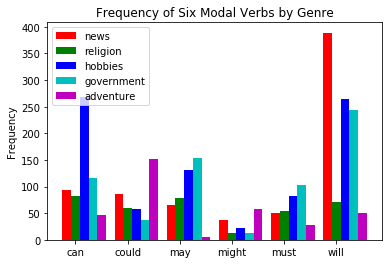

In [255]:
>>> genres = ['news', 'religion', 'hobbies', 'government', 'adventure']
>>> modals = ['can', 'could', 'may', 'might', 'must', 'will']
>>> cfdist = nltk.ConditionalFreqDist(
...              (genre, word)
...              for genre in genres
...              for word in nltk.corpus.brown.words(categories=genre)
...              if word in modals)
...
>>> counts = {}
>>> for genre in genres:
...     counts[genre] = [cfdist[genre][word] for word in modals]
>>> bar_chart(genres, modals, counts)

### NetworkX

The NetworkX package is for defining and manipulating structures consisting of nodes and edges, known as graphs. It is available from https://networkx.lanl.gov/. NetworkX can be used in conjunction with Matplotlib to visualize networks, such as WordNet

*** Using the NetworkX and Matplotlib Libraries***

Visualization with NetworkX and Matplotlib: Part of the WordNet hypernym hierarchy is displayed, starting with dog.n.01 (the darkest node in the middle); node size is based on the number of children of the node, and color is based on the distance of the node from dog.n.01; 

In [260]:
import networkx as nx
import matplotlib
from nltk.corpus import wordnet as wn

def traverse(graph, start, node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name)
        traverse(graph, start, child)

def hyponym_graph(start):
    G = nx.Graph()
    G.depth = {}
    traverse(G, start, start)
    return G

def graph_draw(graph):
    nx.draw_graphviz(graph,
         node_size = [16 * graph.degree(n) for n in graph],
         node_color = [graph.depth[n] for n in graph],
         with_labels = False)
    matplotlib.pyplot.show()

In [261]:
>>> dog = wn.synset('dog.n.01')
>>> graph = hyponym_graph(dog)
>>> graph_draw(graph)

AttributeError: module 'networkx.drawing' has no attribute 'graphviz_layout'

### csv

Language analysis work often involves data tabulations, containing information about lexical items, or the participants in an empirical study, or the linguistic features extracted from a corpus. 

### NumPy

The NumPy package provides substantial support for numerical processing in Python. NumPy has a multi-dimensional array object, which is easy to initialize and access:

In [263]:
>>> from numpy import array
>>> cube = array([ [[0,0,0], [1,1,1], [2,2,2]],
...                [[3,3,3], [4,4,4], [5,5,5]],
...                [[6,6,6], [7,7,7], [8,8,8]] ])

In [264]:
>>> cube[1,1,1]

4

In [265]:
>>> cube[2].transpose()

array([[6, 7, 8],
       [6, 7, 8],
       [6, 7, 8]])

In [266]:
>>> cube[2,1:]

array([[7, 7, 7],
       [8, 8, 8]])

NumPy includes linear algebra functions. Here we perform singular value decomposition on a matrix, an operation used in latent semantic analysis to help identify implicit concepts in a document collection.

In [269]:
>>> from numpy import linalg
>>> a=array([[4,0], [3,-5]])
>>> u,s,vt = linalg.svd(a)
>>> print (u)
>>> print (s)
>>> print (vt)

[[-0.4472136  -0.89442719]
 [-0.89442719  0.4472136 ]]
[ 6.32455532  3.16227766]
[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]


*** NLTK's clustering package nltk.cluster makes extensive use of NumPy arrays, and includes support for k-means clustering, Gaussian EM clustering, group average agglomerative clustering, and dendrogram plots.***

## 9   Summary

Python's assignment and parameter passing use object references; e.g. if a is a list and we assign b = a, then any operation on a will modify b, and vice versa.

The ***is*** operation tests if two objects are identical internal objects, while ***==*** tests if two objects are equivalent. This distinction parallels the type-token distinction.

Strings, lists and tuples are different kinds of sequence object, supporting common operations such as indexing, slicing, len(), sorted(), and membership testing using in.

A declarative programming style usually produces more compact, readable code; manually-incremented loop variables are usually unnecessary; when a sequence must be enumerated, use  enumerate().

Functions are an essential programming abstraction: key concepts to understand are parameter passing, variable scope, and docstrings.

A function serves as a namespace: names defined inside a function are not visible outside that function, unless those names are declared to be global.

Modules permit logically-related material to be localized in a file. A module serves as a namespace: names defined in a module — such as variables and functions — are not visible to other modules, unless those names are imported.

Dynamic programming is an algorithm design technique used widely in NLP that stores the results of previous computations in order to avoid unnecessary recomputation.